# Global Engineering Challenge: Plotting

GOALS:

1. Cleaning data from dataframes
2. How to create plots from dataframes



---


**This workshop/notebook is a continuation of the intro to dataframes notebook 
that you all went through last class! If you need to review some concepts in that notebook, feel free to do so.**


---



Again, I'd recommend using your own notebook in another tab to work in. If you like to write code in this notebook, there's an option at the top to **File - > Save a copy in drive**

Let's import those libraries mentioned earlier. Don't worry about how this works just yet, copy the letters exactly as I write them, the keywords `import` and `as` should change colour. 

In [2]:
import pandas as pd
import seaborn as sns

If you get the `ModuleNotFoundError` check your spelling. Whever you get an 
error: You can also click the **Search Stack Overflow Button** and Google will help you.

# NEW Making New Columns

To add a new column, we simply index with a `'new columns name'`

*This is a dataframe that was used as an example from a previous course; it showcases the rainfall in Northern Toronto in 2020.*

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/justinabella/gecspiring2021/main/NorthTorontoRainfall.csv')

In [ ]:
df

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm)
0,2020-01-01,2020,1,1,3.0,-2.5,0.3,17.7,0.0,0.0,0.0,0.0,1.0
1,2020-01-02,2020,1,2,6.5,-3.5,1.5,16.5,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,2020,1,3,7.0,3.0,5.0,13.0,0.0,0.0,4.0,1.6,0.0
3,2020-01-04,2020,1,4,2.5,-0.5,1.0,17.0,0.0,0.0,0.6,1.4,4.0
4,2020-01-05,2020,1,5,1.5,-3.5,-1.0,19.0,0.0,0.0,5.4,4.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,2020,12,27,4.5,-4.5,0.0,18.0,0.0,6.4,0.0,6.4,15.0
362,2020-12-28,2020,12,28,2.0,-1.0,0.5,17.5,0.0,0.2,0.0,0.2,8.0
363,2020-12-29,2020,12,29,-1.5,-5.5,-3.5,21.5,0.0,0.0,2.2,2.4,6.0
364,2020-12-30,2020,12,30,5.0,-7.0,-1.0,19.0,0.0,2.2,0.0,2.2,7.0


In [ ]:
df['New Columns Name'] = df['Snow on Grnd (cm)'] * 100

Another common conversion we make is to change a string of dates `'2020-12-27'` into a special DateTime datatype. This helps mostly with plotting. 

In [ ]:
df['DateTime'] = pd.to_datetime(df['Date/Time'])

Notice the two new columns we made!!

In [ ]:
df

,Date/Time,Year,Month,Day,Max Temp (°C),Min Temp (°C),Mean Temp (°C),Heat Deg Days (°C),Cool Deg Days (°C),Total Rain (mm),Total Snow (cm),Total Precip (mm),Snow on Grnd (cm),New Columns Name
0,2020-01-01,2020,1,1,3.0,-2.5,0.3,17.7,0.0,0.0,0.0,0.0,1.0,100.0
1,2020-01-02,2020,1,2,6.5,-3.5,1.5,16.5,0.0,0.0,0.0,0.0,0.0,0.0
2,2020-01-03,2020,1,3,7.0,3.0,5.0,13.0,0.0,0.0,4.0,1.6,0.0,0.0
3,2020-01-04,2020,1,4,2.5,-0.5,1.0,17.0,0.0,0.0,0.6,1.4,4.0,400.0
4,2020-01-05,2020,1,5,1.5,-3.5,-1.0,19.0,0.0,0.0,5.4,4.8,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2020-12-27,2020,12,27,4.5,-4.5,0.0,18.0,0.0,6.4,0.0,6.4,15.0,1500.0
362,2020-12-28,2020,12,28,2.0,-1.0,0.5,17.5,0.0,0.2,0.0,0.2,8.0,800.0
363,2020-12-29,2020,12,29,-1.5,-5.5,-3.5,21.5,0.0,0.0,2.2,2.4,6.0,600.0
364,2020-12-30,2020,12,30,5.0,-7.0,-1.0,19.0,0.0,2.2,0.0,2.2,7.0,700.0


# 1.4 Cleaning Dataframes

Many data that you'll find online won't be as "clean" as you would like; there would be some values that are NA, there would be some columns that are not needed, there would even be some values that don't match the proper data types.

Cleaning data is the process of making a .csv file or a dataframe `readable` to the code. The data must be `clean and relevant` so that the code can easily interpret the data given. Otherwise, *you're going to have a bad time.*

Let's start with this real estate dataset.

In [ ]:
cleaning_data = 'https://raw.githubusercontent.com/dataoptimal/posts/master/data%20cleaning%20with%20python%20and%20pandas/property%20data.csv'
cleaning_df = pd.read_csv(cleaning_data)

cleaning_df

,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


Before you start cleaning a data set, it's a good idea to get a general feel for the data. Here, you would decide what data to keep, what to drop, and which data points to fix. Some questions you can ask yourself when beginning to clean data are:


*   What are the features?
*   What are the data types of the columns? (Ideally, each column would have the same data type)
*   Are there any obvious data missing? (N/A values)
*   Are there any not so obvious data missing? (Data that Python can't detect)


Now ask yourself, what can you clean from the data above? Does anything seem off? Are there any data points you think need to be changed/replaced? Give it a look through.

Let's start with identifying what our `features` and *(data types)* are:

*   `PID`: Public Improvement District *(float or int)*
*   `ST_NM`: Street Number *(float or int)*
*   `ST_NAME`: Street Name *(String)*
*   `OWN_OCCUPIED`: Is the residence being occupied right now? *(string, Y or N)*
*   `NUM_BEDROOMS`: Number of bedrooms *(float or int)*
*   `NUM_BATH`: Number of bathrooms *(float or int)*
*   `SQ_FT`: Square feet *(float or int)*

## Getting Rid of Unwanted Columns
Let's say that, for the purposes of this example, we do not need the `PID` column and the `NUM_BATH`. How do we get rid of it?

We can do it in several ways, but the one way we can do it is by defining a new dataframe (or redefining an old one) with the columns we want to keep:

In [ ]:
cleaning_df = cleaning_df[['ST_NUM','ST_NAME','OWN_OCCUPIED','NUM_BEDROOMS','SQ_FT']]
cleaning_df

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT
0,104.0,PUTNAM,Y,3,1000
1,197.0,LEXINGTON,N,3,--
2,NaN,LEXINGTON,N,NaN,850
3,201.0,BERKELEY,12,1,700
4,203.0,BERKELEY,Y,3,1600
5,207.0,BERKELEY,Y,NaN,800
6,NaN,WASHINGTON,NaN,2,950
7,213.0,TREMONT,Y,1,NaN
8,215.0,TREMONT,Y,na,1800


This would be one way to redefine the dataframe. We generally *avoid* using these double brackets because they do get a bit complicated.

An easier way would be to just use the `df.drop()` function.

Inside the brackets, you would specify which column(s) you would like to drop. If you are dropping one column, you would define it as a string. If you are dropping more than one, you would use a list of strings.

Let's drop a few columns again:

In [ ]:
# Resetting the dataframe to bring back all the original columns

cleaning_data = 'https://raw.githubusercontent.com/dataoptimal/posts/master/data%20cleaning%20with%20python%20and%20pandas/property%20data.csv'
cleaning_df = pd.read_csv(cleaning_data)

cleaning_df


,PID,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,NUM_BATH,SQ_FT
0,100001000.0,104.0,PUTNAM,Y,3,1,1000
1,100002000.0,197.0,LEXINGTON,N,3,1.5,--
2,100003000.0,NaN,LEXINGTON,N,NaN,1,850
3,100004000.0,201.0,BERKELEY,12,1,NaN,700
4,NaN,203.0,BERKELEY,Y,3,2,1600
5,100006000.0,207.0,BERKELEY,Y,NaN,1,800
6,100007000.0,NaN,WASHINGTON,NaN,2,HURLEY,950
7,100008000.0,213.0,TREMONT,Y,1,1,NaN
8,100009000.0,215.0,TREMONT,Y,na,2,1800


In [ ]:
# Dropping two columns (the PID and the ST_NUM column)
cleaning_df = cleaning_df.drop(columns=["PID","NUM_BATH"])
cleaning_df

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT
0,104.0,PUTNAM,Y,3,1000
1,197.0,LEXINGTON,N,3,--
2,NaN,LEXINGTON,N,NaN,850
3,201.0,BERKELEY,12,1,700
4,203.0,BERKELEY,Y,3,1600
5,207.0,BERKELEY,Y,NaN,800
6,NaN,WASHINGTON,NaN,2,950
7,213.0,TREMONT,Y,1,NaN
8,215.0,TREMONT,Y,na,1800


## Standard Missing Values

When you look at the dataframe above, upon observation, what do you see wrong? Look at the `ST_NUM` column, there are NAN values there. Under `OWN_OCCUPIED` where we expect to see *Y or N*, what do we see? A 12 and a NaN. These values are unexpected -- we do not anticipate these values and there needs to be action taken to handle them.

Standard missing values are values that the pandas module recognize. In simpler terms, it is the value "NaN". Pandas knows that this value is one that can't be interpreted.

One way to check if the values in a column has these known "NaN" values is to use the `isnull()` function.

By adding `.sum()` to the `isnull()` function, you can see how many NaN values are in a column or dataframe as well.


In [ ]:
cleaning_df

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT
0,104.0,PUTNAM,Y,3,1000
1,197.0,LEXINGTON,N,3,--
2,NaN,LEXINGTON,N,NaN,850
3,201.0,BERKELEY,12,1,700
4,203.0,BERKELEY,Y,3,1600
5,207.0,BERKELEY,Y,NaN,800
6,NaN,WASHINGTON,NaN,2,950
7,213.0,TREMONT,Y,1,NaN
8,215.0,TREMONT,Y,na,1800


In [ ]:
# print(str(cleaning_df['ST_NUM'].isnull()).sum()))
print("There are " + str(cleaning_df['ST_NUM'].isnull().sum()) + " NaN values.")

There are 2 NaN values.


This tells us that the values in row 2 and row 6 are `NaN` values because it returns the Boolean `True`. `isnull()` is a method that asks pandas whether a value is a `NaN` or not. Since in row 2 and row 6, `NaN` is there, then it returns `True`.

## Non-Standard Missing Values

Sometimes, values take different formats. Take a look at the `NUM_BEDROOMS` and the `SQ_FT` columns. There are three different missing value formats:
*   na
*   --
*   NaN
*   oops there's no data here

When you use the `isnull()` method, it will say that rows 2 and 5 are null, but not row 8, which has the `na` value.

In [ ]:
cleaning_df

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT
0,104.0,PUTNAM,Y,3,1000
1,197.0,LEXINGTON,N,3,--
2,NaN,LEXINGTON,N,NaN,850
3,201.0,BERKELEY,12,1,700
4,203.0,BERKELEY,Y,3,1600
5,207.0,BERKELEY,Y,NaN,800
6,NaN,WASHINGTON,NaN,2,950
7,213.0,TREMONT,Y,1,NaN
8,215.0,TREMONT,Y,na,1800


In [ ]:
print(cleaning_df['NUM_BEDROOMS'].isnull())
# print(cleaning_df['SQ_FT'].isnull())

0    False
1    False
2     True
3    False
4    False
5     True
6    False
7    False
8    False
Name: NUM_BEDROOMS, dtype: bool


What you can do is define a list of values you expect to be a missing value and redefine the dataframe once again, using a predetermined list/string and the new argument `na_values` when you first define a dataframe:

In [ ]:
missing_values = ['na', '--']

cleaning_df = pd.read_csv(cleaning_data, na_values = missing_values)

cleaning_df = cleaning_df.drop(columns=["PID","NUM_BATH"])
cleaning_df

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT
0,104.0,PUTNAM,Y,3.0,1000.0
1,197.0,LEXINGTON,N,3.0,NaN
2,NaN,LEXINGTON,N,NaN,850.0
3,201.0,BERKELEY,12,1.0,700.0
4,203.0,BERKELEY,Y,3.0,1600.0
5,207.0,BERKELEY,Y,NaN,800.0
6,NaN,WASHINGTON,NaN,2.0,950.0
7,213.0,TREMONT,Y,1.0,NaN
8,215.0,TREMONT,Y,NaN,1800.0


Now you can see that all the missing values take the form of `NaN`, something that pandas can recognize.

## Unexpected Missing Values

We've seen `NaN` values and all its variations. What if there are values that we don't expect? For example, if our feature is expected to be a string, but there is an integer, then this is technically also a missing value. Take a look at the `OWN_OCCUPIED` column:

In [ ]:
cleaning_df['OWN_OCCUPIED']

0      Y
1      N
2      N
3     12
4      Y
5      Y
6    NaN
7      Y
8      Y
Name: OWN_OCCUPIED, dtype: object

There is a 12 in there, when we would expect a Y or N. To recognize these unexpected missing values, we need to use a bit more of common sense and intuition to recognize them, as pandas won't be able to do that for us.

## Fixing Missing Data

There are several ways we can fix the data. In this example, we are going to get rid of rows, replace NaN values with numbers, and unexpected values with values that make more sense.

We are going to delete Rows 2 and 6: The rows that have a NaN value under the `ST_NUM` column. 

*Note: When choosing to delete rows, use discresion. If you delete too many rows, the data shifts and becomes less of a reflection of what truly is going on.*

In [ ]:
cleaning_df

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT
0,104.0,PUTNAM,Y,3.0,1000.0
1,197.0,LEXINGTON,N,3.0,NaN
2,NaN,LEXINGTON,N,NaN,850.0
3,201.0,BERKELEY,12,1.0,700.0
4,203.0,BERKELEY,Y,3.0,1600.0
5,207.0,BERKELEY,Y,NaN,800.0
6,NaN,WASHINGTON,NaN,2.0,950.0
7,213.0,TREMONT,Y,1.0,NaN
8,215.0,TREMONT,Y,NaN,1800.0


In [ ]:
# Dropping the 2nd and 6th rows. With a list
cleaning_df = cleaning_df.drop([2,6])
cleaning_df

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT
0,104.0,PUTNAM,Y,3.0,1000.0
1,197.0,LEXINGTON,N,3.0,NaN
3,201.0,BERKELEY,12,1.0,700.0
4,203.0,BERKELEY,Y,3.0,1600.0
5,207.0,BERKELEY,Y,NaN,800.0
7,213.0,TREMONT,Y,1.0,NaN
8,215.0,TREMONT,Y,NaN,1800.0


Let's now replace the `12` in `OWN_OCCUPIED` with a `N`. We'll also replace the NaN values with other values.

The values we're replacing NaN in the `NUM_BEDROOMS_` column will be arbitrary, and the ones in the `SQ_FT` column will be the median of the column. Pay attention to the code.

There is a new method here called `.loc`. All this does is locate the variable in the specified [row, column]. In the example below, it is `Row 3` and the column named `OWN_OCCUPIED`. There is also the `fillna()` method, which does what the name says, it fills all the NA values with something you define.

In [ ]:
# Replace the 12 value with N
# Replacing the NaN values using fillna
cleaning_df.loc[3,'OWN_OCCUPIED'] = 'N'
cleaning_df['NUM_BEDROOMS'].fillna(2.0, inplace=True)

# Inplace means that it is updating the source dataframe. If inplace=False, then
# that would mean that it made a copy of the dataframe and left the original untouched.

cleaning_df

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT
0,104.0,PUTNAM,Y,3.0,1000.0
1,197.0,LEXINGTON,N,3.0,NaN
3,201.0,BERKELEY,N,1.0,700.0
4,203.0,BERKELEY,Y,3.0,1600.0
5,207.0,BERKELEY,Y,2.0,800.0
7,213.0,TREMONT,Y,1.0,NaN
8,215.0,TREMONT,Y,2.0,1800.0


Lastly, let's replace the `NaN` values with the `median` of the column.

This is one strategy that you could use when filling in missing values of a numerical column. By selecting the averages, you get to keep important data while not deviating too much from the actual source.

New method: `df['column'].median()`, or `df['column'].mean()`

In [ ]:
cleaning_df['SQ_FT'].fillna(cleaning_df['SQ_FT'].median(), inplace=True)
cleaning_df

,ST_NUM,ST_NAME,OWN_OCCUPIED,NUM_BEDROOMS,SQ_FT
0,104.0,PUTNAM,Y,3.0,1000.0
1,197.0,LEXINGTON,N,3.0,1000.0
3,201.0,BERKELEY,N,1.0,700.0
4,203.0,BERKELEY,Y,3.0,1600.0
5,207.0,BERKELEY,Y,2.0,800.0
7,213.0,TREMONT,Y,1.0,1000.0
8,215.0,TREMONT,Y,2.0,1800.0


# Statistics of a Dataframe
You can look at the statistics of a dataframe by using the `df.describe()` command. Observe what happens when we describe the iris dataset:

In [ ]:
df = sns.load_dataset(name = 'iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df['sepal_length'].max()

7.9

The `df.groupby()` function also gives you key information about the occurence of each value.

In [ ]:
df.groupby(['species']).count()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,50,50,50,50
versicolor,50,50,50,50
virginica,50,50,50,50


In [ ]:
df.groupby(['species']).mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,5.006,3.428,1.462,0.246
versicolor,5.936,2.770,4.260,1.326
virginica,6.588,2.974,5.552,2.026


In [ ]:
df.groupby(['species']).sum()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
setosa,250.3,171.4,73.1,12.3
versicolor,296.8,138.5,213.0,66.3
virginica,329.4,148.7,277.6,101.3


You can make many observations with other methods within Pandas, such as:
*   `df['column'].max()` gives you the maximum value within the column.
*   `df['column'].idxmax()` gives you the **index** of the maximum value; what row that value is in.
*   This same logic applies if you just replaxe `max` with `min` to get the minimum values and/or index number of the minimum value in a column.
*  `df['columm'].median()` returns the median of the column.

And with that, we have a dataframe with clean data that we can use.

## MANDATORY EXERCISE
In this exercise, we will be working with a Twitch Game dataset. In this dataset, we will see data of the top most played games on Twitch from 2016 to 2020. However, there are a few problems with this dataset:
*   There is one specific month with missing data in the `Month` column. Figure out how many missing (NaN) values are in this column, what month is missing, and fill in this data with the correct month value. *HINT: A combination of MASKING and df.loc would be one way in identifying which of the 12 months are missing. Remember, the missing values are the same month, so they would be filled in with the same value.*
*   The entire `Hours_Streamed` column has the word 'hours' in each data value, making the value into a string. For example, in the first row, it shows '1362044 hours' instead of the integer 1362044. *HINT: Try using a for loop. Also, if you need to change a value directly, you need to have an* `=` *sign. For example,* `df['column1'][3] = 'value'` *turns index 3 in column1 to the string 'value'*

Your job is to fix all this data.

In [3]:
# Here is a sample code that you can figure out. This is another hint to the exercise.

cookie = "12 cookies"
cookie = cookie[:-8]

cookie = int(cookie)
print(cookie)
print(type(cookie))

12
<class 'int'>


In [4]:
twitch_df = pd.read_csv('https://raw.githubusercontent.com/justinabella/gecsummer2021/main/Twitch_game_data.csv')
twitch_df

# Write your code here
# -------------------------

twitch_df[twitch_df['Month'].isnull()]
twitch_df.loc[6050, 'Month']

# July has missing data



for index, row in twitch_df.iterrows():
  twitch_df['Hours_Streamed'][index] = row['Hours_Streamed'][:-6]

twitch_df

# -------------------------

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  from ipykernel import kernelapp as app


,Rank,Game,Month,Year,Hours_watched,Hours_Streamed,Peak_viewers,Peak_channels,Streamers,Avg_viewers,Avg_channels,Avg_viewer_ratio
0,1,League of Legends,1.0,2016,94377226,1362044,530270,2903,129172,127021,1833,69.29
1,2,Counter-Strike: Global Offensive,1.0,2016,47832863,830105,372654,2197,120849,64378,1117,57.62
2,3,Dota 2,1.0,2016,45185893,433397,315083,1100,44074,60815,583,104.26
3,4,Hearthstone,1.0,2016,39936159,235903,131357,517,36170,53749,317,169.29
4,5,Call of Duty: Black Ops III,1.0,2016,16153057,1151578,71639,3620,214054,21740,1549,14.03
...,...,...,...,...,...,...,...,...,...,...,...,...
11945,196,Visage,12.0,2020,524013,18022,16424,78,3960,705,24,29.08
11946,197,Outlast,12.0,2020,519209,27662,97966,107,8728,698,37,18.77
11947,198,Call of the Sea,12.0,2020,515643,8380,45252,104,1806,694,11,61.53
11948,199,Fallout 76,12.0,2020,515422,79420,3226,201,6147,693,106,6.49







---



# 1.5 Easy Plots (SEABORN) 

Let's return to our Iris dataset from last class.
*Is there an easier way to do all this?*

The easiest way to plot our data is to use a library called seaborn (imported earlier: `import seaborn as sns`) and its plotting functions. These functions ONLY WORK WITH data in a `dataframe`, so if you wouldn't be able to plot a list of numbers with it. 




Seaborn has many functions for many plots, in each you pass in the dataframe you want to plot with `data = df`. 

In [ ]:
df = sns.load_dataset(name = 'iris')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


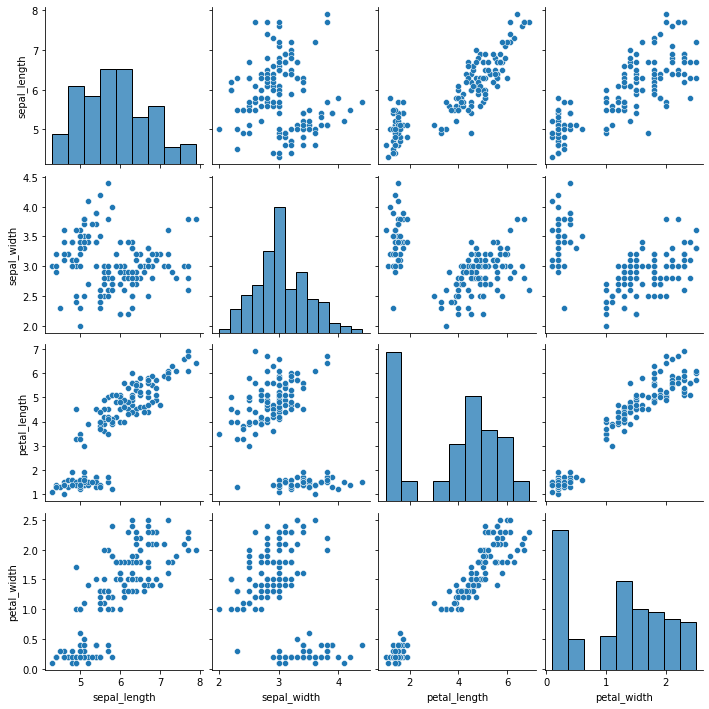

In [ ]:
sns.pairplot(data = df)

`sns.pairplot()` is a very powerful function which plots every number column against each other. There are 14 subplots, eg the bottom left plots the `'petal_width' vs 'sepal_length'` of all 150 flowers, while the diagonals show a histogram (more on that later!) 

As a function, you can ***HOVER OVER WITH YOUR MOUSE TO LEARN MORE.***  The `data=` input is required, we also see the  `hue = ` input, you can set it to **any of the columns** in the data and the plot will automatically adjust colours to represent more information.

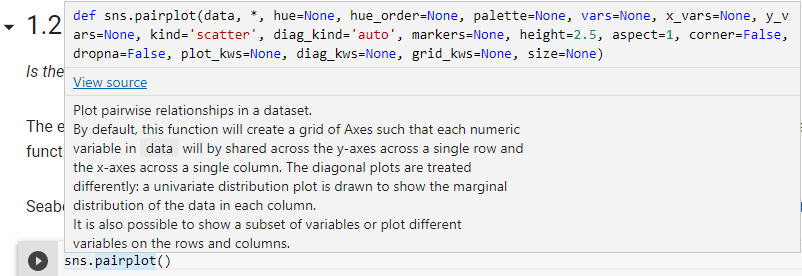

Here we use `hue = 'species'`:

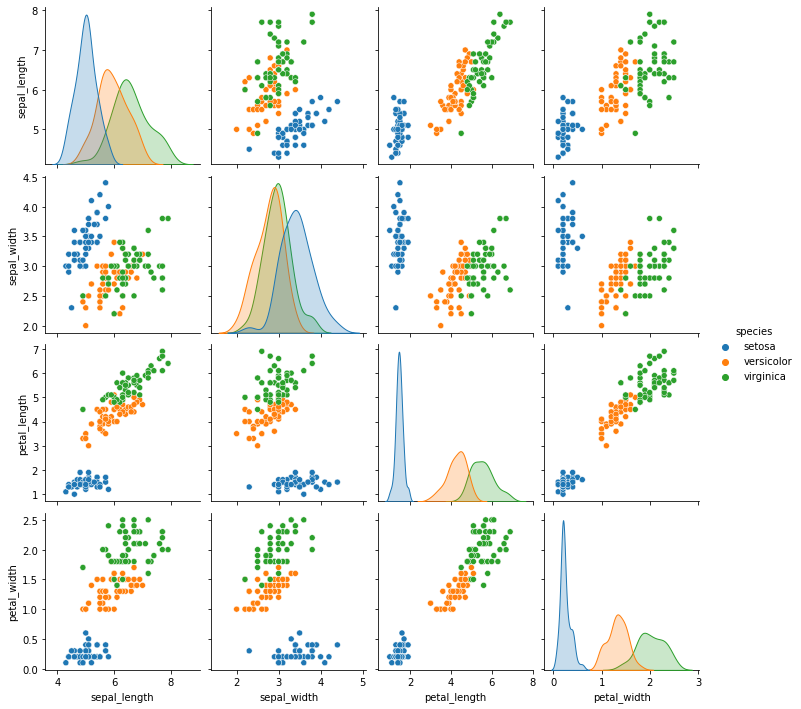

In [ ]:
sns.pairplot(data = df, hue = 'species')

Use `sns.pairplot()` with caution, as it can take too long for large `df`s!

In our dataframe: `species` is a **CATEGORY** (it always takes one of three distinct values) while ***ALL THE OTHER COLUMNS*** are ***CONTINOUS*** (it can take any value on a number line)

In [ ]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Generally, we want to put a **CATEGORY** for color (`hue = `) and plot numbers/continuous values on the `x=` and `y=` (as you are probabily familiar with in Math class). Here is another plot to demonstrate:

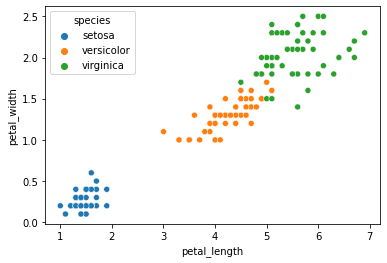

In [ ]:
sns.scatterplot(data = df, x = 'petal_length', y = 'petal_width', hue = 'species')

This plot was found in the bottom of the `sns.pairplot()` we made earlier! See if you can find it!

And we tell `sns.scatterplot` which values we want to plot on the `x = ` and `y = ` axis by specifying the **COLUMN NAME** as a *STRING* such as 

```
sns.scatterplot(data = df, x = 'sepal_width', y = 'sepal_length')
```
function. 



You can also plot each of the CATEGORIES (`species`) separately and have them side by side in columns. We use `sns.relplot()` and set the `species =` input: 

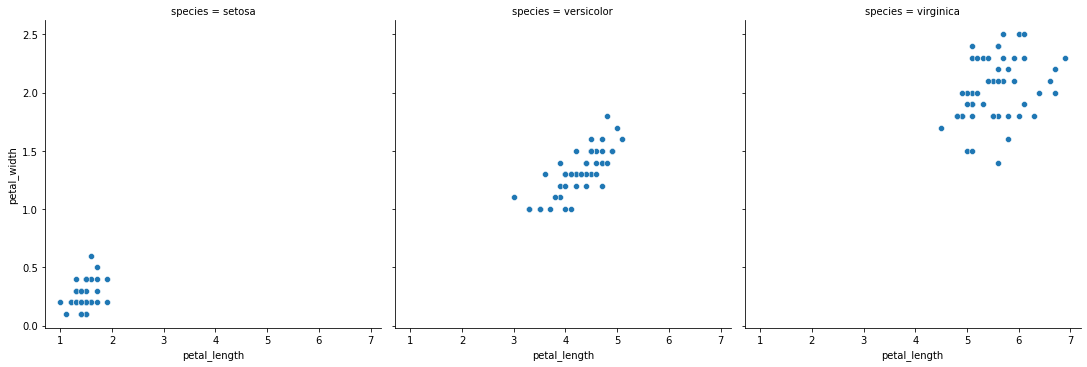

In [ ]:
sns.relplot(data = df, x = 'petal_length', y = 'petal_width', col = 'species')

Sometimes, you want a CATEGORIGAL variable (like `species`) on the X axis, for a barchart perhaps, so we can make that happen with `sns.catplot` 

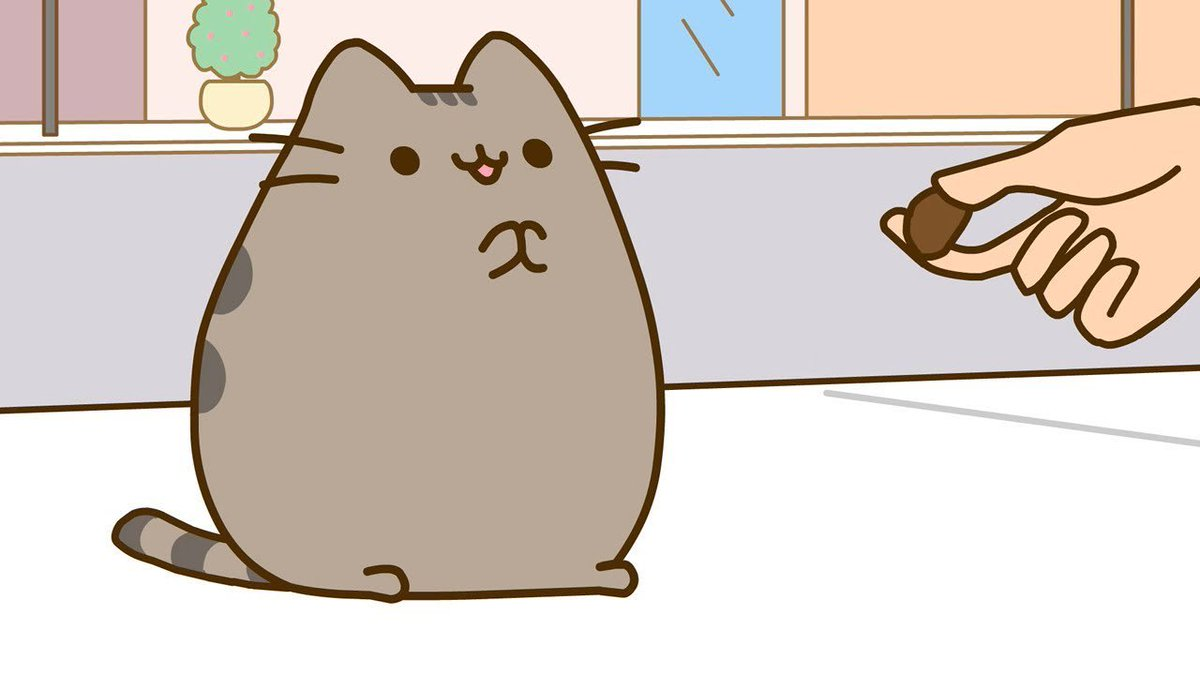

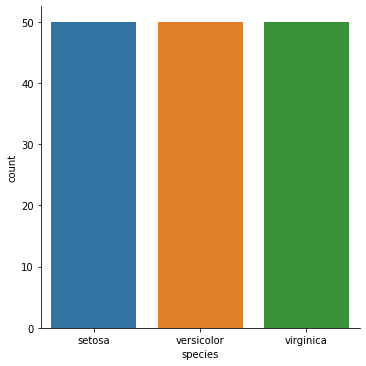

In [ ]:
sns.catplot(data = df, x = 'species', kind = 'count')

This plot might not show much, but the `count` of each category in a dataframe will be really useful in your projects. In this case, it just so happens we have 50 setosa, 50 verisicolor and 50 virginica flowers. 

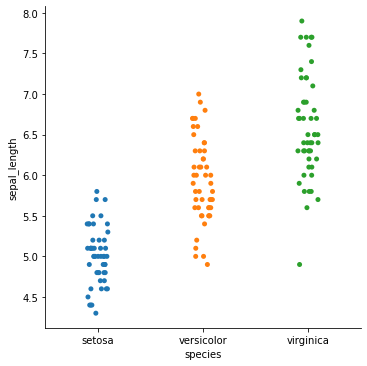

In [ ]:
sns.catplot(data = df, x = 'species', y = 'sepal_length')

Here we plot the `sepal_length` on the y axis, and we see that virginica flowers tend to have longer `sepal_length`

---

## MANDATORY EXERCISE
Work with another interesting dataset, the mpg dataset of 397 cars and its various properties, more information about this dataset can be found [here](https://www.kaggle.com/uciml/autompg-dataset). 

Ask yourself a question about the data and try to prove it with a plot.

Using what you learned with seaborn and data plotting, plot the cars dataframe and answer the following question, using your plots to back up your answers:


*   Does more horsepower correspond to more or less miles per gallon?
*   Which country makes the best cars?
*   How does weight, model_year or acceleration affect mpg?

Additionally, using data cleaning and other pandas methods, find out what the following parameters are:

*   The mean average horsepower of all USA cars.
*   The name of the lightest and heaviest car.







In [ ]:
df_cars = sns.load_dataset('mpg')

In [ ]:
df_cars

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
# Put your code in here

sns.scatterplot(data = df_cars, x = 'horsepower', y = 'mpg', hue = 'origin')

NameError: ignored

# FUTURE REFERENCE

Learn more about matplotlib by looking at some of their example plots [here](https://matplotlib.org/3.2.1/tutorials/introductory/sample_plots.html)
and seaborn [here](https://seaborn.pydata.org/introduction.html)


Although matplotlib and seaborn are the OGs of the plotting world, other useful plotting libraries have its own advantages. Feel free to investigate: 

1.   Plotly
2.   ggplot
3. flourish



In [5]:
oregondata = 'https://raw.githubusercontent.com/justinabella/gecsummer2021/main/Oregon_historical_wildfires.csv'
oregondf = pd.read_csv(oregondata)

oregondf

,id,fire_year,report_date,county,latitude,longitude,total_acres,odf_acres,fuel_model,fuel_descr,general_cause,fire_name,district,unit,legal
0,1,1961,1961-01-25,Washington,NaN,NaN,8.00,8.00,X,non-wildland fuel,Miscellaneous,61511004,51 - Tillamook,Tillamook,T000 R000 S00
1,2,1961,1961-04-04,Washington,NaN,NaN,5.00,5.00,X,non-wildland fuel,Debris Burning,61511009,51 - Tillamook,Tillamook,T000 R000 S00
2,3,1961,1961-04-09,Washington,NaN,NaN,0.05,0.05,X,non-wildland fuel,Recreationist,61511011,51 - Tillamook,Tillamook,T000 R000 S00
3,4,1961,1961-05-24,Washington,NaN,NaN,1.00,1.00,X,non-wildland fuel,Smoking,61511012,51 - Tillamook,Tillamook,T000 R000 S00
4,5,1961,1961-06-19,Washington,NaN,NaN,0.05,0.05,X,non-wildland fuel,Miscellaneous,61511016,51 - Tillamook,Tillamook,T000 R000 S00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66306,66307,2020,2020-06-13,Klamath,43.524511,-120.046042,0.00,0.00,X,non-wildland fuel,Debris Burning,Crescent Meadows,99 - Walker Range,Walker FPA,T24S R6E S1 SENW
66307,66308,2020,2020-06-23,Klamath,43.592750,-120.354250,2.00,2.00,X,non-wildland fuel,Arson,Processor,99 - Walker Range,Walker FPA,T23S R9E S9 NESE
66308,66309,2020,2020-06-24,Klamath,43.541667,-120.500533,0.00,0.00,X,non-wildland fuel,Debris Burning,Forest Meadows,99 - Walker Range,Walker FPA,T3S R10E S35 NENW
66309,66310,2020,2020-06-30,Klamath,43.471200,-120.296167,0.10,0.10,X,non-wildland fuel,Equipment Use,Bark,99 - Walker Range,Walker FPA,T24S R9E S30 NWNW
